<a href="https://colab.research.google.com/github/alejomedinazanca/wine_quality/blob/main/Alejo_Medina_Proyecto_vinos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto análisis vinos
---

###  **1 - Metadata**



### **1.1 - Descripción de los datos.**

Set de vinos blancos y tintos de distinta calidad con sus características y propiedades.

6497 registros. 14 columnas.

Fuente: "https://www.kaggle.com/datasets/turhancankargin/wine-quality-red-and-white"

"The dataset is related to red and white variants of the Portuguese "Vinho Verde" wine. For more details, consult the reference [Cortez et al., 2009].
These datasets can be viewed as classification or regression tasks."


### **1.2 - Glosario**

    Columnas ----------------------- Descripción
    'fixed acidity' ---------------- 'acidez_fija': Cantidad de ácidos no volátiles en el vino.
    'volatile acidity' ------------- 'acidez_volatil': Medida de los ácidos volátiles.
    'citric acid' ------------------ 'acido_citrico': Ácido natural presente en pequeñas cantidades.
    'residual sugar' --------------- 'azucar_residual': 	Cantidad de azúcar que permanece después de la fermentación.
    'chlorides' -------------------- 'cloruros': Presencia de sales (principalmente cloruro de sodio).
    'free sulfur dioxide' ---------- 'dioxido_azufre_libre': Cantidad de SO₂ libre disponible para proteger el vino de la oxidación y bacterias.,
    'total sulfur dioxide' : 'diox_azufre_total': Total de SO₂ presente (libre y combinado). Usado como conservante.
    'density': 'densidad' ---------- Relación entre masa y volumen del vino.,
    'sulphates': 'sulfatos' -------- Compuestos añadidos que actúan como conservantes antimicrobianos.,
    'alcohol': 'alcohol' ----------- Porcentaje de alcohol en volumen (% vol). ,
    'quality': 'calidad' ----------- Puntuación del vino por los catadores (1 - 10),
    'color': 'vino' ---------------- Tipo de vino: tinto o blanco.
    'high_quality': 'calidad_alta' - Indica si el vino es de calidad alta, a partir de 7 se considera vino de alta calidad

# **2. - Objetivo Analitico**
---


### **2.1 - Objetivo Analitico**
Con la intención de entrenar un algoritmo para predecir la calificación de un vino a raíz de de sus propiedades correspondientes a las 14 columnas.

### **2.2 - Contexto**
Desde la Asociación de sommeliers se nos pidió predecir cuáles son los vinos de mayor calidad según un informe del laboratorio químico de la provincia.

### **2.3 - Problema**
Desde la Asociación de sommeliers están interesados en producir su propio vino por lo que buscarían las uvas que presenten las características de los vinos mejor evaluados

### **2.4 Planteo de hipótesis**
Tenemos la idea de que la calidad de un vino va más allá del gusto y de la apreciación subjetiva de los catadores. El nivel de acidez, la graduación de alcohol, la densidad y otras variables se relacionan entre sí y dan como resultado ditintas clases de vinos. Nos planteamos por el momento pequeñas hipótesis:
-  Un nivel muy alto de acidez produce un vino de peor calidad, y cuanto más bajo es, la calidad aumenta. Quisieramos ver qué tan bajo debe ser.
- La densidad del vino es consecuencia de su acidez, así como el residuo de azucar luego de la fermentación y de la graduación de alcohol

# **3 - Importación de datos**

### **3.1 - Descarga del archivo .csv**

In [ ]:
!gdown 1NokuWb6A0Xwdyt6XnD7NDgS8vM0_dVgg

Downloading...
From: https://drive.google.com/uc?id=1NokuWb6A0Xwdyt6XnD7NDgS8vM0_dVgg
To: /content/wine.csv
100% 501k/501k [00:00<00:00, 27.9MB/s]


### **3.2- Importación de librerías**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **4 - Primera exploración de datos**

In [ ]:
df = pd.read_csv('wine.csv', index_col = 0) #index_col = 0 para que los indices sean
                                                 #la primera columna que tiene el archivo wine.csv
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color,high_quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,0


In [ ]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,high_quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.633061
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.482007
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,0.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,1.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,1.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


Observamos qué contiene cada columna con el método de pandas DataFrame.info()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6497 entries, 0 to 4897
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  color                 6497 non-null   object 
 13  high_quality          6497 non-null   int64  
dtypes: float64(11), int64(2), object(1)
memory usage: 761.4+ KB


#### Observamos que no hay ninguna columna con datos nulos. Por lo cual, no perderemos tiempo pensando si nos convendría usar dropna(), fillna() o alguna manera de manipular datos nulos. Lo corroboramos con DataFrame.isnull().sum()

In [ ]:
df.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


#### Optamos por traducir los nombres de las columnas del inglés al español

In [ ]:
traducciones = {
    'fixed acidity': 'acidez_fija',
    'volatile acidity': 'acidez_volatil',
    'citric acid': 'acido_citrico',
    'residual sugar': 'azucar_residual',
    'chlorides': 'cloruros',
    'free sulfur dioxide': 'dioxido_azufre_libre',
    'total sulfur dioxide': 'dioxido_azufre_total',
    'density': 'densidad',
    'sulphates': 'sulfatos',
    'alcohol': 'alcohol',
    'quality': 'calidad',
    'color': 'vino',
    'high_quality': 'calidad_alta'
}

In [ ]:
df.rename(columns = traducciones, inplace = True)
df.head()

,acidez_fija,acidez_volatil,acido_citrico,azucar_residual,cloruros,dioxido_azufre_libre,dioxido_azufre_total,densidad,pH,sulfatos,alcohol,calidad,vino,calidad_alta
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,0


# **5 - Manipulación de datos**

In [ ]:
wine_df = df.copy()

In [ ]:
wine_df['vino'].unique()

array(['red', 'white'], dtype=object)

#### Vemos que la columna vino (originalmente 'color') tiene dos valores unicos, a saber: 'red' y 'white'. En la siguiente celda los traduciremos a 'tinto' y 'blanco'.

In [ ]:
wine_df['vino'] = wine_df['vino'].map({'red': 'tinto', 'white': 'blanco'})
wine_df.head(10)

,acidez_fija,acidez_volatil,acido_citrico,azucar_residual,cloruros,dioxido_azufre_libre,dioxido_azufre_total,densidad,pH,sulfatos,alcohol,calidad,vino,calidad_alta
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,tinto,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,tinto,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,tinto,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,tinto,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,tinto,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,tinto,0
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,tinto,0
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,tinto,1
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,tinto,1
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,tinto,0


Por el momento, no hay nada más que sea necesario manipular.

# **6. Visualización de datos**

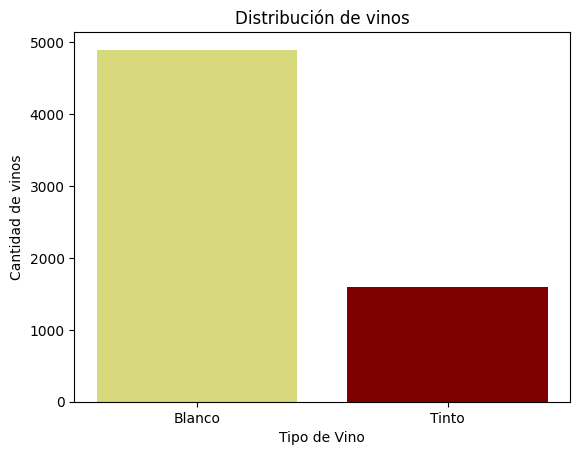

In [ ]:
vinos = wine_df['vino'].value_counts()
plt.bar(vinos.index, vinos, color = ['#d8d87c', '#800000'])
plt.xticks(ticks = [0,1], labels = vinos.index.str.capitalize())
plt.title('Distribución de vinos')
plt.xlabel('Tipo de Vino')
plt.ylabel('Cantidad de vinos')
plt.show()

Por lo que se puede observar en la gráfica, en el dataset hay más vinos blancos que tintos.

In [ ]:
# Podemos corroborarlo rápidamente con la siguiente función, a saber: groupby()
wine_df.groupby('vino')['vino'].value_counts()

,count
vino,
blanco,4898
tinto,1599


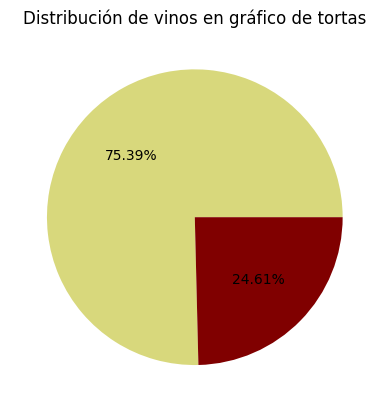

In [ ]:
plt.pie(wine_df['vino'].value_counts(), autopct= "%.2f%%", colors=['#d8d87c', '#800000'])
plt.title('Distribución de vinos en gráfico de tortas')

plt.show()

Para hacer un gráfico de líneas, podemos tomar dos variables como calidad y la graduación de alcohol y ver esto representado según el tipo de vino

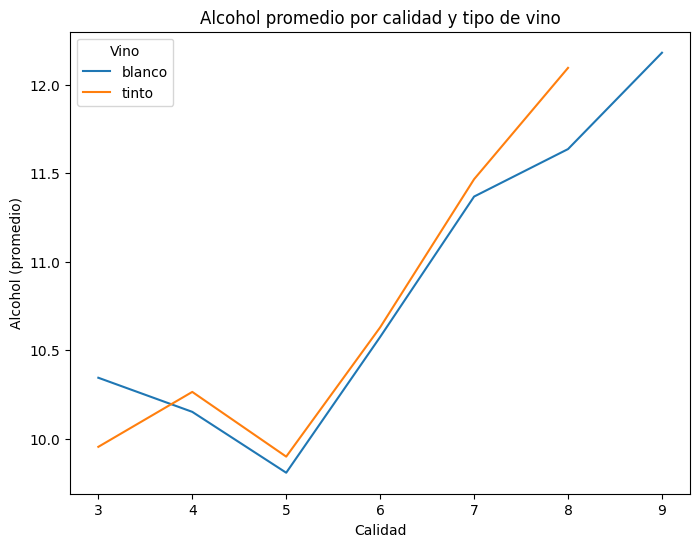

In [ ]:
grupo = wine_df.groupby(['calidad', 'vino'])['alcohol'].mean().reset_index()

fig, ax = plt.subplots(figsize=(8, 6))

for tipo_vino in grupo['vino'].unique():
    sub = grupo[grupo['vino'] == tipo_vino]
    ax.plot(sub['calidad'], sub['alcohol'], label=tipo_vino)

ax.set_xlabel('Calidad')
ax.set_ylabel('Alcohol (promedio)')
ax.set_title('Alcohol promedio por calidad y tipo de vino')
ax.legend(title='Vino')

plt.show()


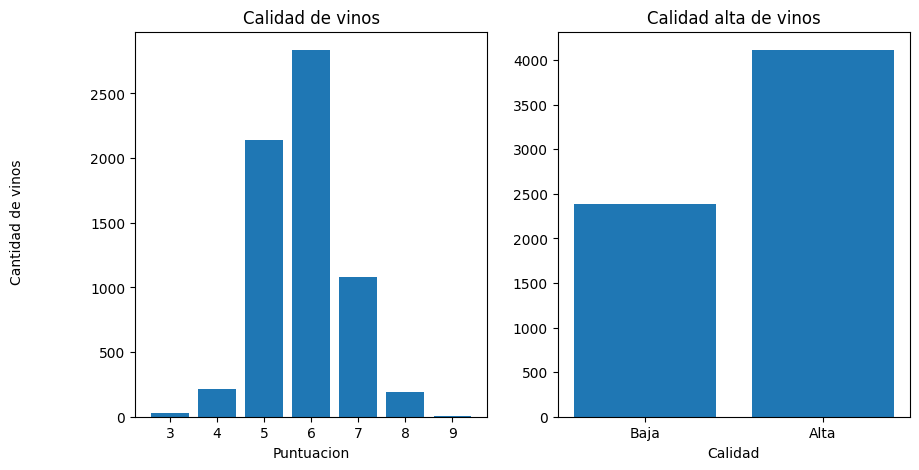

In [ ]:
fig, ax = plt.subplots(1,2, figsize = (10,5))
ax[0].bar(wine_df['calidad'].value_counts().index, wine_df['calidad'].value_counts())
ax[0].set_title('Calidad de vinos')
ax[0].set_xlabel('Puntuacion')

ax[1].bar(wine_df['calidad_alta'].value_counts().index, wine_df['calidad_alta'].value_counts())
ax[1].set_title('Calidad alta de vinos')
ax[1].set_xlabel('Calidad')
ax[1].set_xticks([0,1], labels = ['Baja', 'Alta'])

fig.text(0,0.5,'Cantidad de vinos', va = 'center', rotation = 'vertical')

plt.show()

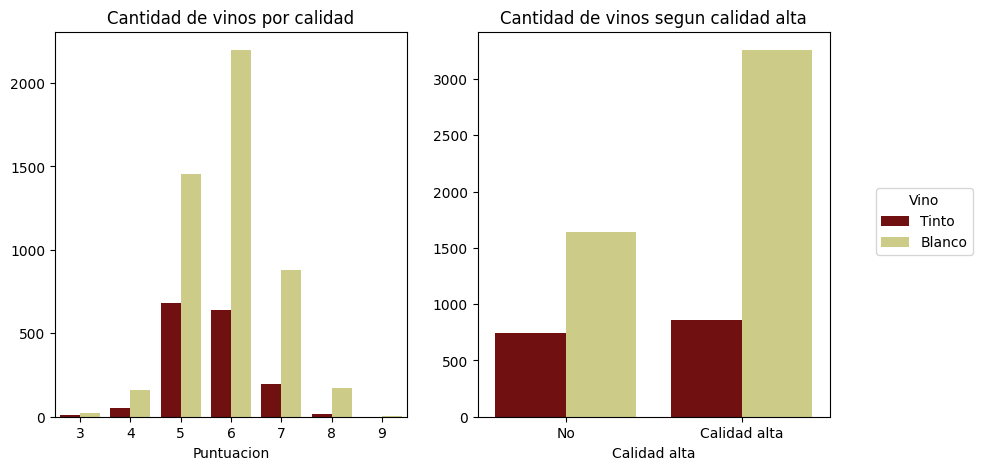

In [ ]:
paleta = {'tinto': '#800000', 'blanco': '#d8d87c'}

fig, ax = plt.subplots(1,2, figsize = (10,5))

sns.countplot(data=wine_df, x='calidad', hue='vino', palette=paleta, ax=ax[0])
ax[0].set_title('Cantidad de vinos por calidad')
ax[0].set_ylabel('')
ax[0].set_xlabel('Puntuacion')
ax[0].legend_.remove()


sns.countplot(data=wine_df, x='calidad_alta', hue='vino', palette=paleta, ax= ax[1])
ax[1].set_title('Cantidad de vinos segun calidad alta')
ax[1].set_xlabel('Calidad alta')
ax[1].set_ylabel('')
ax[1].set_xticks([0,1], labels = ['No', 'Calidad alta'])
ax[1].legend_.remove()

fig.legend(wine_df['vino'].str.capitalize().unique(), title='Vino', loc='center right', ncol=1, bbox_to_anchor=(1.05, 0.5))


plt.show()

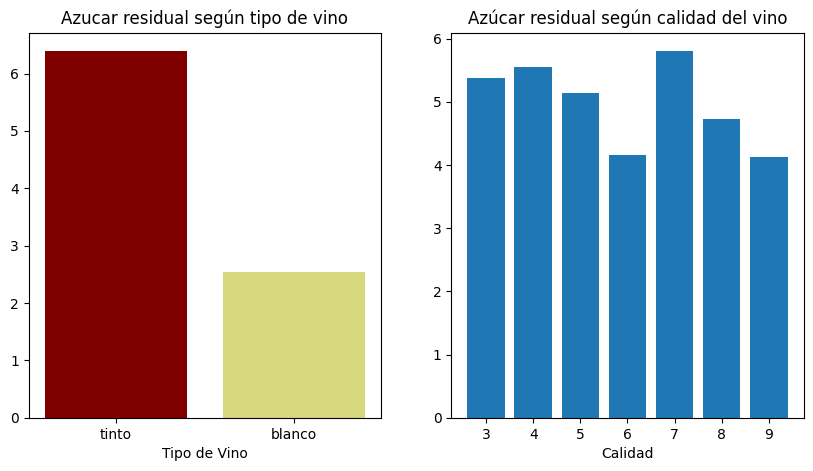

In [ ]:
fig, ax = plt.subplots(1,2, figsize = (10,5))

ax[0].bar(wine_df['vino'].unique(), wine_df.groupby('vino')['azucar_residual'].mean(), color = ['#800000', '#d8d87c'])
ax[0].set_title('Azucar residual según tipo de vino')
ax[0].set_xlabel('Tipo de Vino')

ax[1].bar(wine_df['calidad'].unique(), wine_df.groupby('calidad')['azucar_residual'].mean())
ax[1].set_title('Azúcar residual según calidad del vino')
ax[1].set_xlabel('Calidad')

plt.show()

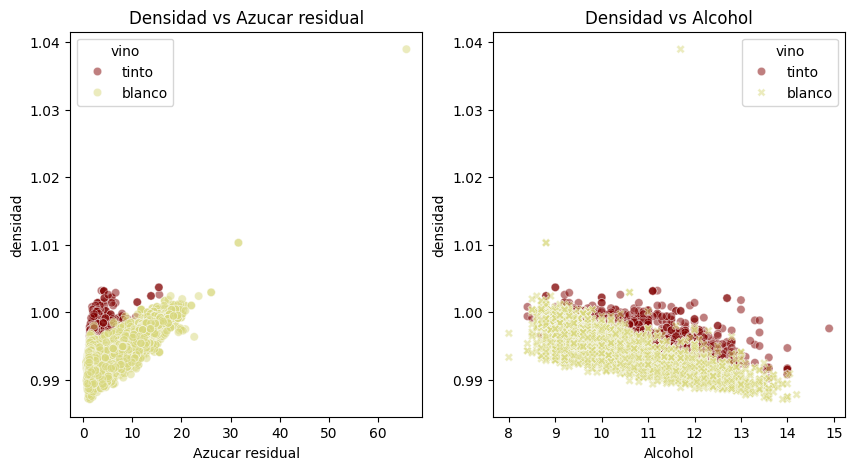

In [ ]:
fig, ax = plt.subplots(1,2, figsize = (10,5))
sns.scatterplot(wine_df,x = wine_df['azucar_residual'], y = wine_df['densidad'], hue = wine_df['vino'], ax=ax[0],
                 palette = ['#800000', '#d8d87c'], alpha = 0.5)
ax[0].set_title('Densidad vs Azucar residual')
ax[0].set_xlabel('Azucar residual')

sns.scatterplot(wine_df,x = wine_df['alcohol'], y = wine_df['densidad'],
                hue = wine_df['vino'], ax=ax[1], palette = ['#800000', '#d8d87c'],
                style='vino',
                alpha = 0.5)
ax[1].set_title('Densidad vs Alcohol')
ax[1].set_xlabel('Alcohol')

plt.show()


<Axes: xlabel='vino', ylabel='alcohol'>

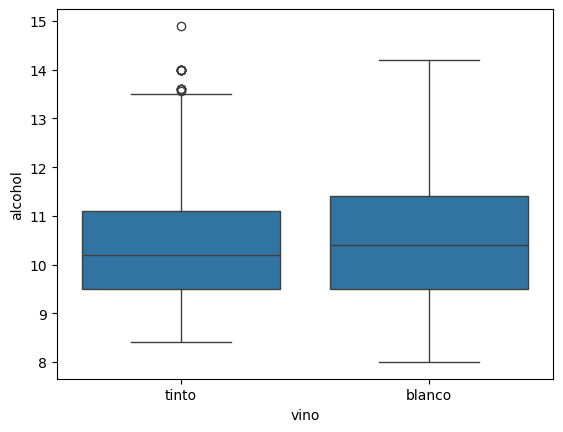

In [ ]:
sns.boxplot(data=wine_df, x='vino', y='alcohol')

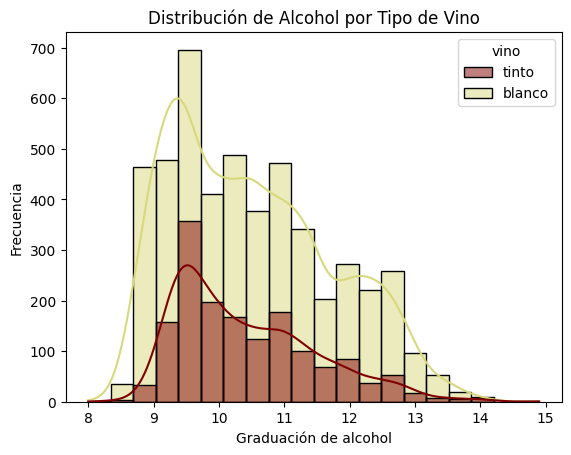

In [ ]:
sns.histplot(data=wine_df, x='alcohol', hue='vino', kde=True, bins=20, palette = ['#800000', '#d8d87c'])
plt.title('Distribución de Alcohol por Tipo de Vino')
plt.xlabel('Graduación de alcohol')
plt.ylabel('Frecuencia')
plt.show()

<Axes: xlabel='calidad', ylabel='alcohol'>

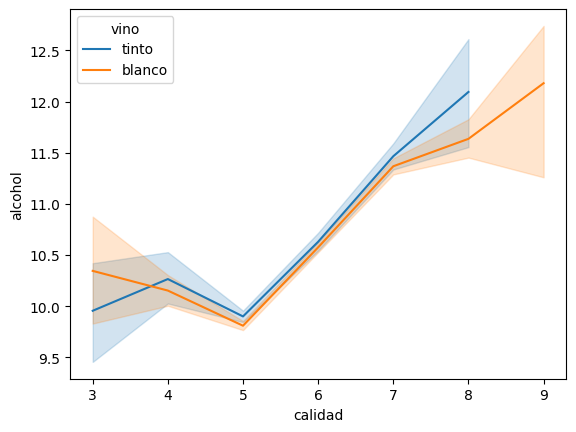

In [ ]:
sns.lineplot(data=wine_df, x='calidad', y='alcohol', hue='vino', estimator='mean')


Podemos graficar en los ejes de fig con un bucle que muestre todas las correlaciones de 'densidad' con las demas variables.

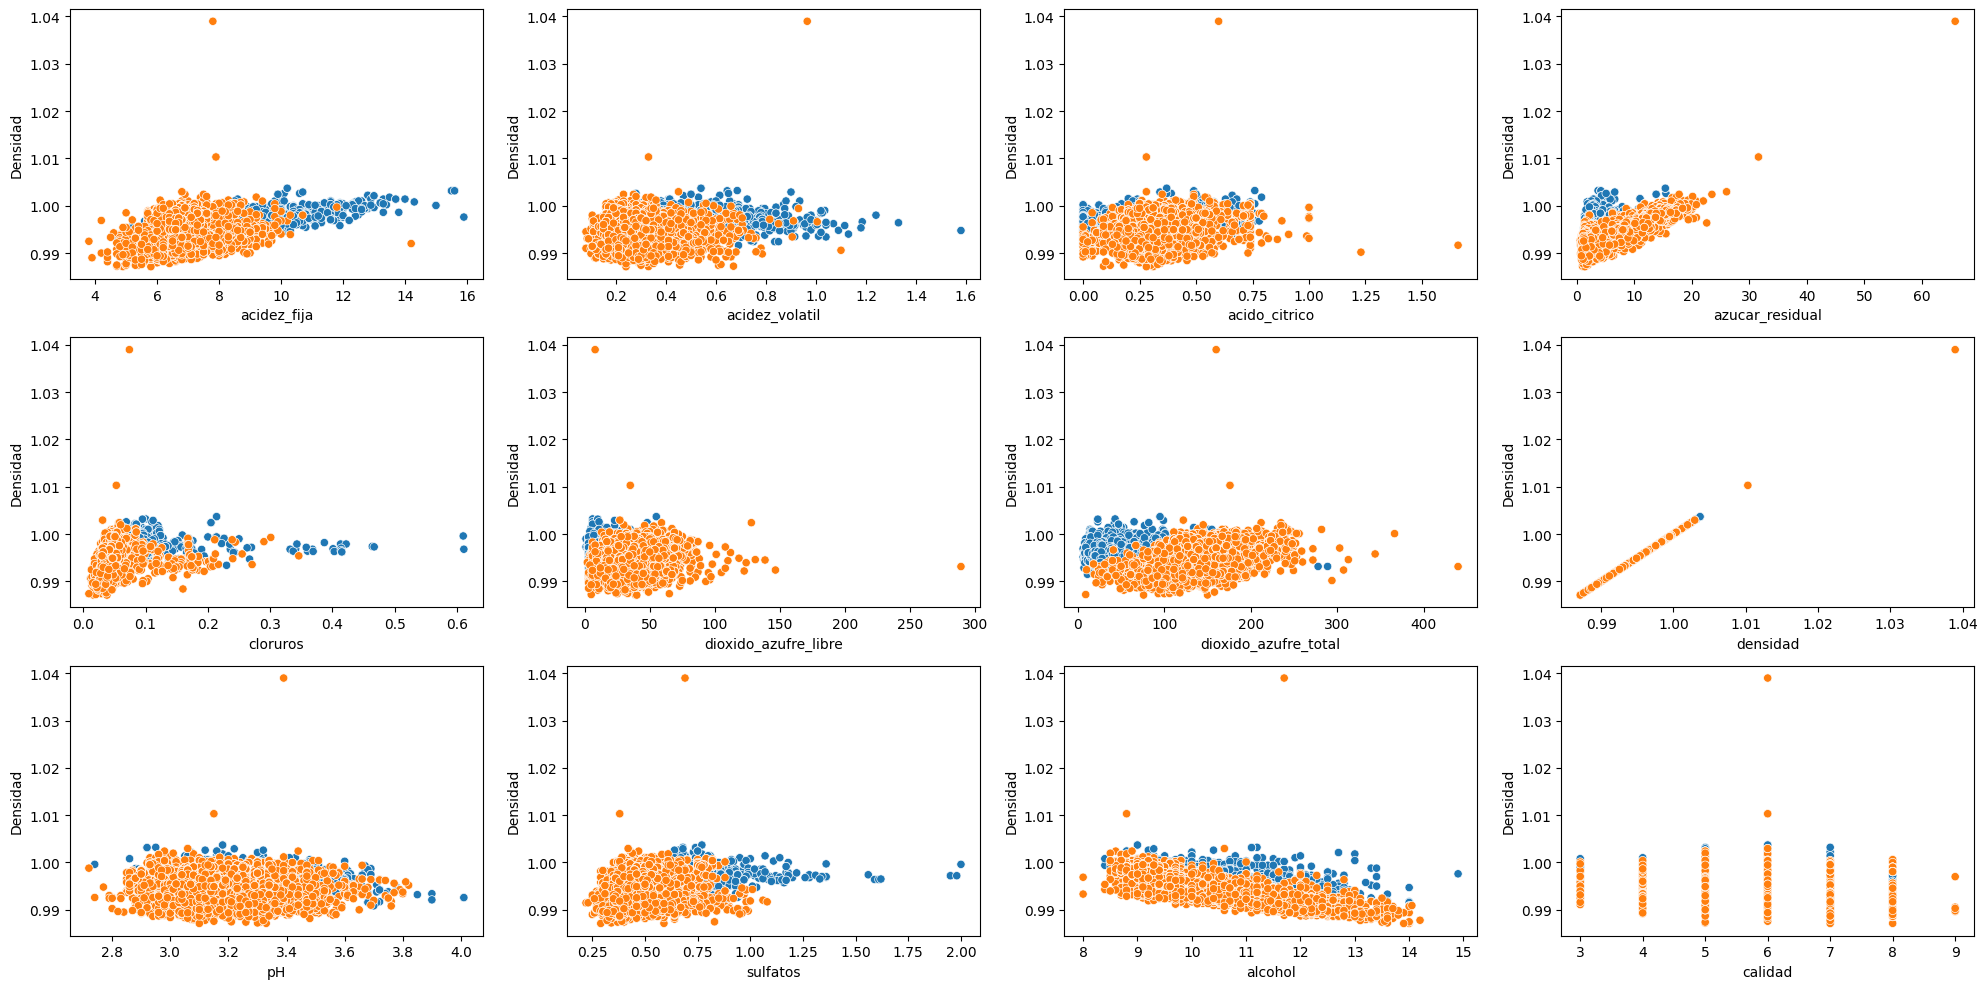

In [ ]:
fig, ax = plt.subplots(3,4, figsize = (20,10))
for i in range(3):
  for j in range(4):
    sns.scatterplot(wine_df,x = wine_df.iloc[:,i*4+j], y = wine_df['densidad'],
                hue = wine_df['vino'], ax=ax[i,j])
    ax[i,j].set_ylabel('Densidad')
    ax[i,j].set_xlabel(wine_df.columns[i*4+j])
    ax[i,j].legend_.remove()

plt.tight_layout()

plt.show()

Las más llamativas son los gráfico correspondientes a la densidad vs alcohol, y la densidad vs acidez fija

Hacemos lo mismo con la graduación de alcohol y las demás variables

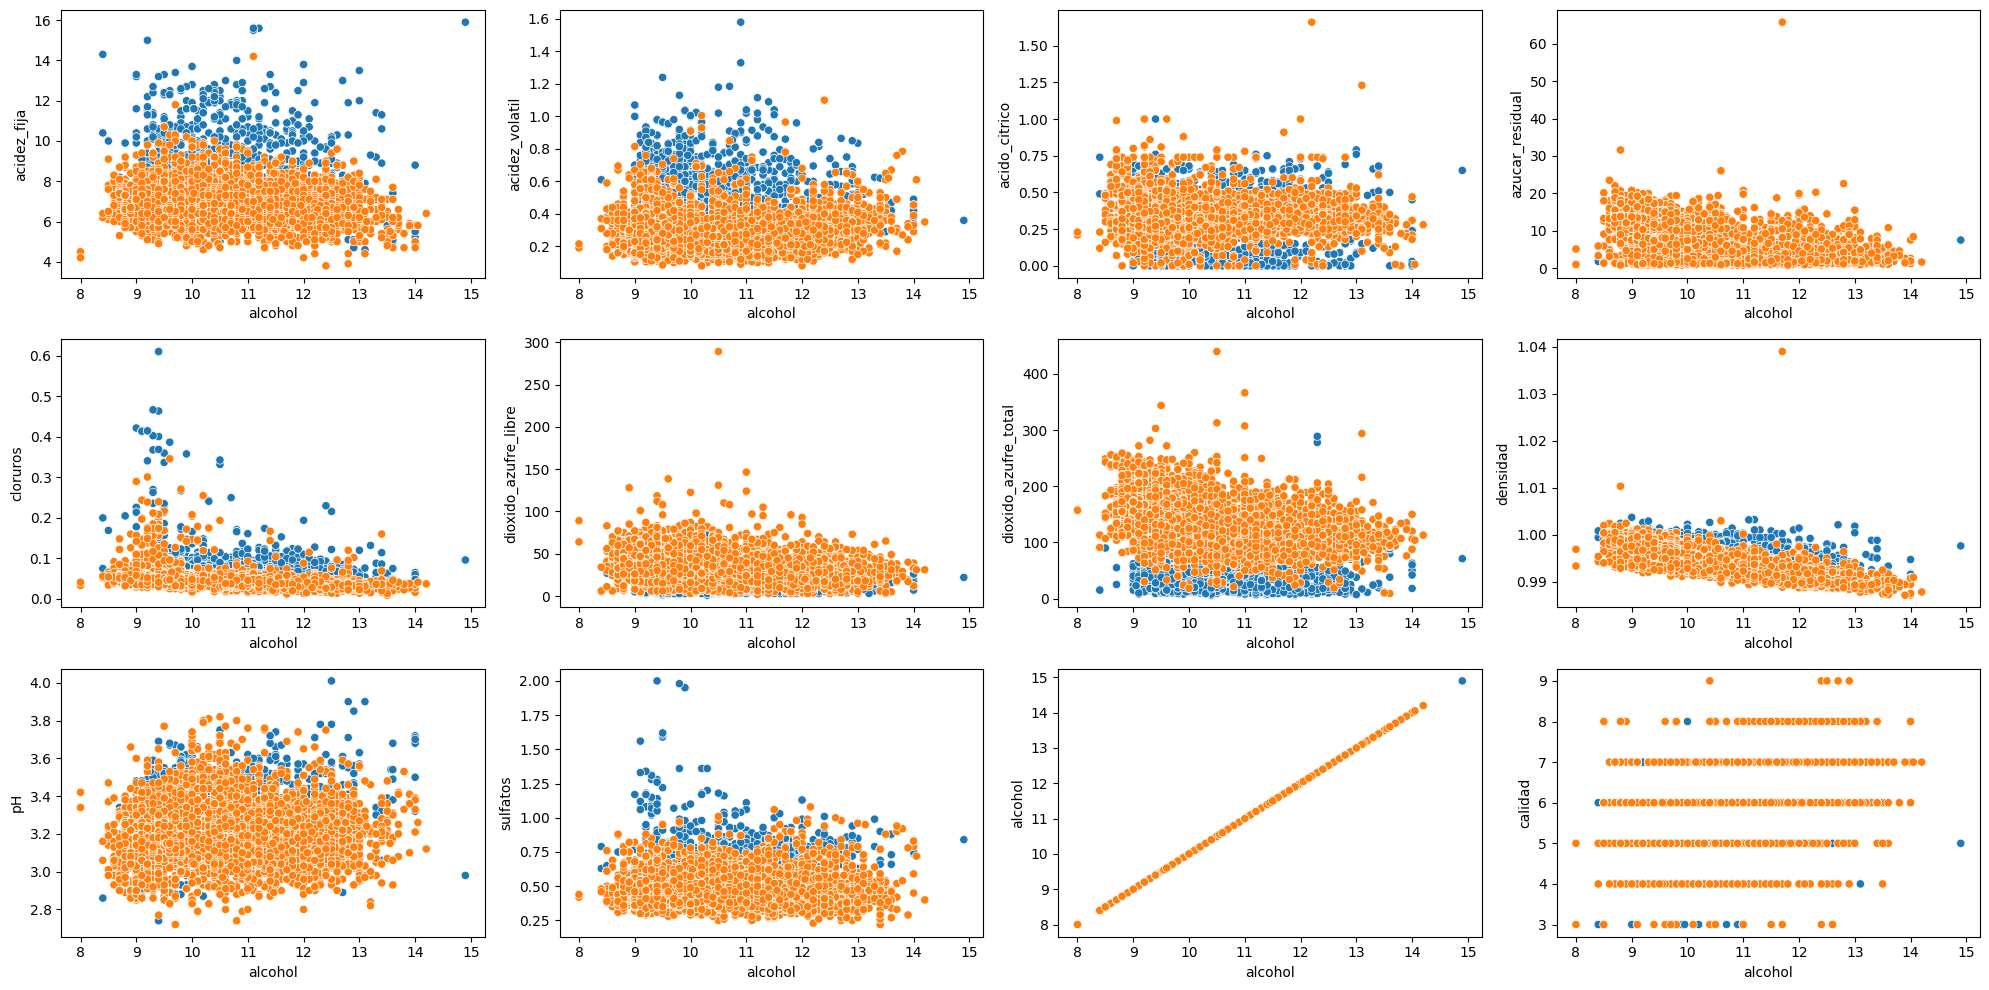

In [ ]:
fig, ax = plt.subplots(3,4, figsize = (20,10))
for i in range(3):
  for j in range(4):
    sns.scatterplot(wine_df,x = wine_df['alcohol'], y = wine_df.iloc[:,i*4+j],
                hue = wine_df['vino'], ax=ax[i,j])
    ax[i,j].set_xlabel('alcohol')
    ax[i,j].set_ylabel(wine_df.columns[i*4+j])
    ax[i,j].legend_.remove()

plt.tight_layout()

plt.show()

En estos casos no pareciera haber mucha correlación por fuera de la que ya habíamos observado: alcohol vs densidad

Esto mismo lo podemos ver gráficamente para cada columna con todas las demás por medio de un mapa de calor con la función de seaborn sns.heatmap()

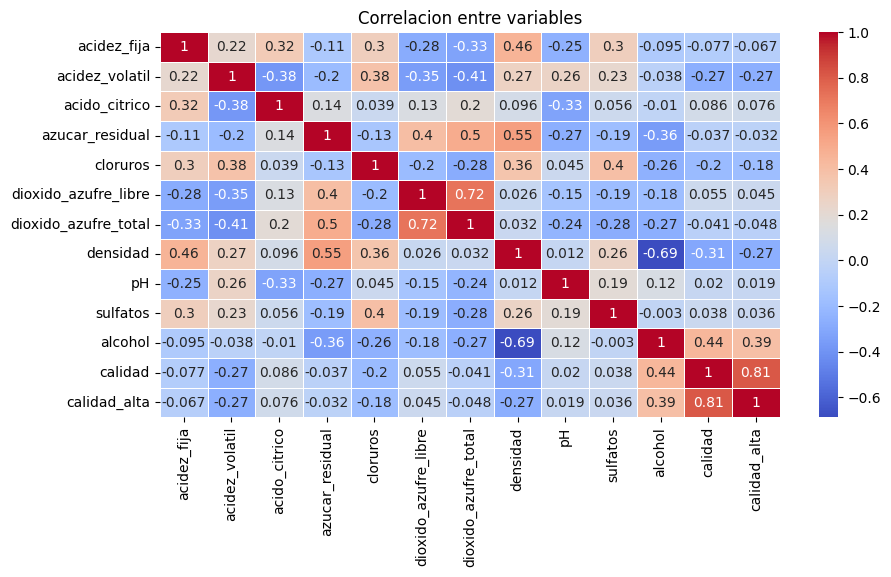

In [ ]:
plt.figure(figsize = (10,5))
sns.heatmap(wine_df.drop('vino', axis=1).corr(), annot = True, cmap = 'coolwarm', linewidths = 0.5)
plt.title('Correlacion entre variables')
plt.show()

# **7. Conclusiones parciales**

Podemos concluir por el momento que en el dataset hay muchos más casos de vinos blancos que de tintos.

Que conforme aumenta la calidad de un vino también aumenta en promedio su graduación en alcohol como se ve en los casos tanto de vino tinto como de vino blanco

El azúcar residual de los vinos tintos es mucho mayor que la de los vinos blancos

Según los boxplots, la graduación de alcohol para los cuartiles 1 al cuartil 3, en los vinos blancos varía desde los aproximadamente 9,5 % al 11,5 % y en los vinos tintos estos valores varían de 9,5 % a 11 %

La única correlación que pudimos ver en el gráfico de dispersión fue que la graduación de alcohol y la densidad del vino se relacionan de forma inversa.

In [ ]:
#Selección de Variables
#X = df.drop('vino', axis=1).values #Elimino de mi dataset la variable a predecir
y = df['vino'].values #Defino el Target

In [ ]:
#Validación del primer registro
X[0:1]

array([[ 7.4   ,  0.7   ,  0.    ,  1.9   ,  0.076 , 11.    , 34.    ,
         0.9978,  3.51  ,  0.56  ,  9.4   ,  5.    ,  0.    ]])

In [ ]:
#Validación de primer registro
y[1:2]

array(['red'], dtype=object)

# **ENTRENAMIENTO**

In [ ]:
# Dividir los datos en conjuntos de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# random_state = 42: es el más popular (referencia a The Hitchhiker's Guide to the Galaxy, donde 42 es "la respuesta al sentido de la vida").

In [ ]:
#Datos X_train
X_train

array([[ 6.1 ,  0.24,  0.3 , ..., 10.4 ,  5.  ,  0.  ],
       [ 9.4 ,  0.29,  0.55, ..., 10.3 ,  4.  ,  0.  ],
       [ 8.4 ,  0.37,  0.43, ..., 11.2 ,  7.  ,  1.  ],
       ...,
       [ 6.8 ,  0.2 ,  0.59, ...,  9.1 ,  6.  ,  1.  ],
       [ 6.6 ,  0.22,  0.37, ..., 10.3 ,  7.  ,  1.  ],
       [ 8.7 ,  0.22,  0.42, ..., 10.  ,  5.  ,  0.  ]])

In [ ]:
#Datos X_test
X_test

array([[ 6.3 ,  0.18,  0.24, ...,  9.2 ,  6.  ,  1.  ],
       [ 6.8 ,  0.14,  0.18, ..., 11.2 ,  6.  ,  1.  ],
       [ 7.3 ,  0.22,  0.5 , ...,  9.  ,  6.  ,  1.  ],
       ...,
       [ 7.6 ,  0.38,  0.2 , ...,  9.4 ,  5.  ,  0.  ],
       [ 7.8 ,  0.27,  0.33, ..., 11.  ,  6.  ,  1.  ],
       [ 7.5 ,  0.38,  0.56, ...,  9.9 ,  6.  ,  1.  ]])

In [ ]:
#Datos X_train
y_train

array(['white', 'white', 'red', ..., 'white', 'white', 'white'],
      dtype=object)

In [ ]:
#Datos y_test
y_test

array(['white', 'white', 'white', ..., 'white', 'white', 'white'],
      dtype=object)

In [ ]:
#Cantidad de Datos Parciales
X_train.shape, X_test.shape

((4547, 13), (1950, 13))

In [ ]:
#Cantidad de Datos Parciales
y_train.shape, y_test.shape

((4547,), (1950,))

# **ENTRENAMIENTO DEL ALGORITMO**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn import datasets

In [ ]:
#Aplicacion del algoritmo de decisión con limitación de ramas
clf = DecisionTreeClassifier(max_depth=2, random_state=0)
model = clf.fit(X_train, y_train)

In [ ]:
y_test_pred = model.predict(X_test) #Prediccion en Test
y_train_pred = model.predict(X_train) #Prediccion en Train

In [ ]:
y_train_pred

array(['white', 'white', 'red', ..., 'red', 'white', 'white'],
      dtype=object)

In [ ]:
y_test_pred

array(['white', 'white', 'white', ..., 'white', 'white', 'white'],
      dtype=object)

# **VALIDACION DEL ENTRENAMIENTO**

In [ ]:
#Generar un dataframe entre train y train_predict
df_train = pd.DataFrame({'Real': y_train, 'Prediccion': y_train_pred})
df_train

,Real,Prediccion
0,white,white
1,white,white
2,red,red
3,white,white
4,red,red
...,...,...
4542,white,white
4543,white,white
4544,white,red
4545,white,white


# **VALIDACION DEL ENTRENAMIENTO**

In [ ]:
#Generar un dataframe entre test y test_predict
df_test = pd.DataFrame({'Real': y_test, 'Prediccion': y_test_pred})
df_test

,Real,Prediccion
0,white,white
1,white,white
2,white,white
3,white,red
4,white,white
...,...,...
1945,white,white
1946,white,white
1947,white,white
1948,white,white


In [ ]:
df_test[df_test['Real'] == df_test['Prediccion']]['Prediccion'].shape[0]/y_test.shape[0]

0.9635897435897436

In [ ]:
prediccion = df_test[df_test['Real'] == df_test['Prediccion']]['Prediccion'].shape[0]/y_test.shape[0]

print(f'La precision es de {prediccion*100} %')

La precision es de 96.35897435897436 %
